# Nifty Stocks Analysis:



## Table of Contents

- [Raw data](#Raw-data:)
    - [Entity Relationship Diagram](#Entity-Relationship-Diagram)
    - [Sample Data](#Sample-Data)
- [Data Integration](#Data-Integration:)
- [Data Cleaning](#Data-Cleaning:)
- [Data Analysis Questions](#A.-Customer-Journey)

## Raw data:

- **The dataset have 53 tables**: 
    - 50 tables for 50 stocks of Nifty.
    - 1 Info table that contains some information about the stocks.
    - 1 stock split table. A share split, also known as a stock split, is a corporate action that increases the number of shares outstanding while proportionally decreasing the price per share. <br/><br/>
- **Useful information about Stocks table**: The following columns collectively provide valuable information about the price, volume, and trading activity of individual stocks on specific trading days.
    - Date: The date of the trading day for which the data is recorded. It indicates when the stock market transactions took place.

    - Symbol: the unique symbol or ticker symbol assigned to each specific stock. The symbol is used to identify and track the performance of a particular company's stock.

    - Series: The series or category of the stock. It could be categorized as equity shares, preference shares, or any other specific type of security.

    - Prev Close: The closing price of the stock on the previous trading day. It represents the price at which the stock last traded before the current trading day.

    - Open: The opening price of the stock at the beginning of the trading day.

    - High: The highest price reached by the stock during the trading day.

    - Low: The lowest price reached by the stock during the trading day.

    - Last: The price at which the stock last traded during the trading day.

    - Close: The closing price of the stock at the end of the trading day.

    - VWAP (Volume Weighted Average Price): The average price at which a particular stock has been traded throughout the trading day, taking into account the volume of shares traded at each price level.

    - Volume: The total number of shares traded for the specific stock on the trading day.

    - Turnover: The total value of all the shares traded for the specific stock on the trading day.

    - Trades: The total number of trades executed for the specific stock on the trading day.

    - Deliverable Volume: The volume of shares that were actually delivered (bought or sold) by the participants in the market during the trading day.

    - %Deliverble: The percentage of the total traded volume that corresponds to the deliverable volume. It provides an indication of how much of the total volume traded actually resulted in the physical delivery of shares.

### Entity Relationship Diagram

![convert notebook to web app](https://drive.google.com/uc?id=1IvmkxpIKCCMmGY-v1Im5pUb_Tf8NOxHO)

### Sample Data

#### Adani Ports Share

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.read_csv('C:\\Users\\A222401\\OneDrive - Syneos Health\\Desktop\\Udit\\Data\\Nifty Project\\Nifty Stocks\\ADANIPORTS.csv').tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


#### Category Table

In [4]:
category = pd.read_csv('C:\\Users\\A222401\\OneDrive - Syneos Health\\Desktop\\Udit\\Data\\Nifty Project\\stock_metadata.csv')
category.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018


#### Stock Split Table

In [77]:
stock_split = pd.read_excel('C:\\Users\\A222401\\OneDrive - Syneos Health\\Desktop\\Udit\\Data\\Nifty Project\\stock_split_data.xlsx')
stock_split.head()

,Split date,Company,Split ratio
0,"Jul 08, 2022",Torrent Pharma (TORP),2:1
1,"Jun 30, 2022",Indian Oil (IOC),1.5:1
2,"Jan 06, 2022",SBI Gold (SBIG),100:1
3,NaN,SBI Gold (SBIG),100:1
4,"Dec 16, 2021",Quantum Gold (QTGF),50:1


## Data Integration:

#### Appending 50 csv files of 50 stocks in 1 dataframe

In [5]:
import pathlib

folder_path = pathlib.Path(r"C:\\Users\\A222401\\OneDrive - Syneos Health\\Desktop\\Udit\\Data\\Nifty Project\\Nifty Stocks\\")
csv_files = folder_path.glob("*.csv")
df = pd.concat((pd.read_csv(csv_file) for csv_file in csv_files))

In [6]:
df.reset_index(inplace = True,drop=True)

In [7]:
len(df)  #Number of total rows

470384

[Back to top](#Danny's-Diner-Case-Study:)

## Data Cleaning:

- Column Data types: Changing Date column from object to datetime
- Handling Null values
- Transforming Data
- Removing duplicate rows

In [8]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes #Date Column now has data type datetime

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [73]:
stock_split.dtypes

Split date     object
Company        object
Split ratio    object
Symbol         object
dtype: object

In [91]:
stock_split['Split date'] = pd.to_datetime(stock_split['Split date'])
stock_split.dtypes

Split date     datetime64[ns]
Company                object
Split ratio            object
Symbol                 object
dtype: object


<div style="background-color: #FFFFE0;">
    The date columns of both the tables have been converted into correct data type.
</div>

In [23]:
df.isnull().any()

Date                  False
Symbol                False
Series                False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume     True
%Deliverble            True
dtype: bool


<div style="background-color: #FFFFE0;">
    Trades column can be null because for some reasons the trading gets blocked by the firms, hence no need to clean the df table.
</div>

In [78]:
stock_split.isnull().any()

Split date      True
Company        False
Split ratio    False
dtype: bool

In [79]:
stock_split.head(10) #Only the date column has null values. And those too should have the first previous non-blank value.

,Split date,Company,Split ratio
0,"Jul 08, 2022",Torrent Pharma (TORP),2:1
1,"Jun 30, 2022",Indian Oil (IOC),1.5:1
2,"Jan 06, 2022",SBI Gold (SBIG),100:1
3,NaN,SBI Gold (SBIG),100:1
4,"Dec 16, 2021",Quantum Gold (QTGF),50:1
5,NaN,Quantum Gold Exchange Traded Scheme (QTGF),50:1
6,"Nov 25, 2021",Aditya Birla Sun Life Banking (ADIL),10:1
7,NaN,Aditya Birla Sun Life Banking (ADIL),10:1
8,NaN,Aditya Birla Sun Life Nifty 50 (ADIY),10:1
9,NaN,Aditya Birla Sun Life Nifty 50 (ADIY),10:1


In [80]:
stock_split['Split date'] = stock_split['Split date'].fillna(method='ffill')

stock_split.head(10)

,Split date,Company,Split ratio
0,"Jul 08, 2022",Torrent Pharma (TORP),2:1
1,"Jun 30, 2022",Indian Oil (IOC),1.5:1
2,"Jan 06, 2022",SBI Gold (SBIG),100:1
3,"Jan 06, 2022",SBI Gold (SBIG),100:1
4,"Dec 16, 2021",Quantum Gold (QTGF),50:1
5,"Dec 16, 2021",Quantum Gold Exchange Traded Scheme (QTGF),50:1
6,"Nov 25, 2021",Aditya Birla Sun Life Banking (ADIL),10:1
7,"Nov 25, 2021",Aditya Birla Sun Life Banking (ADIL),10:1
8,"Nov 25, 2021",Aditya Birla Sun Life Nifty 50 (ADIY),10:1
9,"Nov 25, 2021",Aditya Birla Sun Life Nifty 50 (ADIY),10:1



<div style="background-color: #FFFFE0;">
    Now the date column does not have null values.
</div>

In [51]:
stock_split['Symbol'] = stock_split['Company'].str.extract('\((.*?)\)')

stock_split.head()

,Split date,Company,Split ratio,Symbol
0,"Jul 08, 2022",Torrent Pharma (TORP),2:1,TORP
1,"Jun 30, 2022",Indian Oil (IOC),1.5:1,IOC
2,"Jan 06, 2022",SBI Gold (SBIG),100:1,SBIG
3,"Jan 06, 2022",SBI Gold (SBIG),100:1,SBIG
4,"Dec 16, 2021",Quantum Gold (QTGF),50:1,QTGF



<div style="background-color: #FFFFE0;">
    Extracted the Symbols from Company column.
</div>

In [86]:
#There are some duplicate rows in this table
stock_split.drop_duplicates(inplace = True)
stock_split.head()

,Split date,Company,Split ratio
0,"Jul 08, 2022",Torrent Pharma (TORP),2:1
1,"Jun 30, 2022",Indian Oil (IOC),1.5:1
2,"Jan 06, 2022",SBI Gold (SBIG),100:1
4,"Dec 16, 2021",Quantum Gold (QTGF),50:1
5,"Dec 16, 2021",Quantum Gold Exchange Traded Scheme (QTGF),50:1



<div style="background-color: #FFFFE0;">
    Removed duplicate rows.
</div>

## Solutions:

### 1. Which industry has the highest number of stocks or companies listed under Nifty 50?
We are not seeing the weightage of any industries since the weightage depends on several parameters which are not in our dataset.

In [11]:
#Joing stocks table and Category table
df_category = pd.merge(df, category, on="Symbol")

#Common columns into one
df_category['Series'] = df_category['Series_x'].fillna(df_category['Series_y']) 
df_category = df_category.drop(['Series_x','Series_y'],axis = 1)

#Group by Industries
count_stocks = (df_category.groupby(["Industry"], as_index=False)          
    .agg({"Symbol": pd.Series.nunique})
    .sort_values("Symbol", ascending=True)
).reset_index(drop=True)

#rename_columns
count_stocks.rename(columns = {'Symbol':'#Companies'}, inplace = True)
count_stocks.head()

,Industry,#Companies
0,CONSTRUCTION,1
1,FERTILISERS & PESTICIDES,1
2,MEDIA & ENTERTAINMENT,1
3,SERVICES,1
4,TELECOM,1


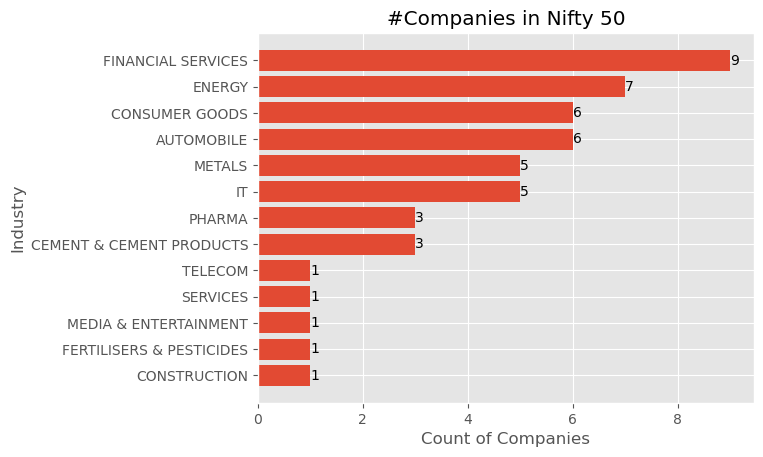

In [17]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")                     #Selecting the style for charts
x = count_stocks["Industry"]
y = count_stocks["#Companies"]
plt.barh(x, y)
plt.gca().set(
    xlabel="Count of Companies", ylabel="Industry", title="#Companies in Nifty 50"           
)

[plt.text(y[i], x[i], j, ha="left", va="center") for i, j in enumerate(y)]           #Adding data labels in bars

plt.show()


[Back to top](#Danny's-Diner-Case-Study:)

Personally, I am a big fan of banking stocks so let's see how these stocks have done over the past years.

### 2. Historical Performance of any Banking stock(s)?

In [12]:
df_fin = df_category.loc[df_category['Industry'] == "FINANCIAL SERVICES"].reset_index(drop=True)
df_fin['Company Name'].unique()

array(['Axis Bank Ltd.', 'Bajaj Finserv Ltd.', 'Bajaj Finance Ltd.',
       'Housing Development Finance Corporation Ltd.', 'HDFC Bank Ltd.',
       'ICICI Bank Ltd.', 'IndusInd Bank Ltd.',
       'Kotak Mahindra Bank Ltd.', 'State Bank of India'], dtype=object)

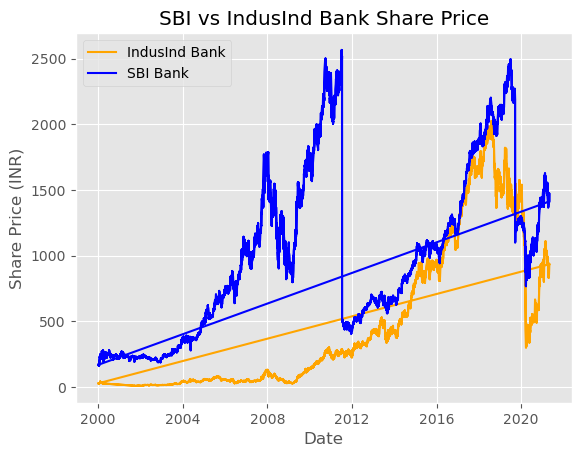

In [60]:
df_fin_Indus, df_fin_SBI  = df_fin.loc[df_fin['Company Name'] == 'IndusInd Bank Ltd.'], df_fin.loc[df_fin['Company Name'] == 'HDFC Bank Ltd.']
x1, y1 = df_fin_Indus['Date'], df_fin_Indus['Close']
x2,y2 = df_fin_SBI['Date'], df_fin_SBI['Close']
plt.plot(x1,y1,color = 'orange',label = 'IndusInd Bank')
plt.plot(x2,y2,color = 'blue', label = 'SBI Bank')
plt.gca().set(
    xlabel="Date", ylabel="Share Price (INR)", title="SBI vs IndusInd Bank Share Price")
plt.legend()
plt.show()


- At around 2012 SBI bank shares had a share split.
- In Mar 2020, the big depression is due to the Corona Virus.

### 2. How many shares had gone through share split in the past?

In [94]:
nifty_stocks_split = pd.merge(category,stock_split, on = 'Symbol', how = 'inner')

nifty_stocks_split.head()

,Company Name,Industry,Symbol,Series,ISIN Code,Split date,Company,Split ratio
0,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011,2017-07-13,Bharat Petroleum (BPCL),1.5:1
1,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011,2016-07-13,Bharat Petroleum (BPCL),2:1
2,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011,2012-07-13,Bharat Petroleum (BPCL),2:1
3,Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011,2000-12-18,Bharat Petroleum (BPCL),2:1
4,GAIL (India) Ltd.,ENERGY,GAIL,EQ,INE129A01019,2019-07-09,GAIL Ltd (GAIL),2:1


In [96]:
nifty_stocks_split.groupby(["Symbol","Company Name"],as_index = False)['Split date'].count().rename(columns = {'Split date':'# Splits'})

,Symbol,Company Name,# Splits
0,BPCL,Bharat Petroleum Corporation Ltd.,4
1,GAIL,GAIL (India) Ltd.,4
2,HDFC,Housing Development Finance Corporation Ltd.,2
3,INFY,Infosys Ltd.,5
4,IOC,Indian Oil Corporation Ltd.,5
5,ITC,ITC Ltd.,4
6,NTPC,NTPC Ltd.,1
7,ONGC,Oil & Natural Gas Corporation Ltd.,3
8,TCS,Tata Consultancy Services Ltd.,3


In [116]:
stock_split.loc[stock_split['Symbol'] == 'HDBK']

,Split date,Company,Split ratio,Symbol
55,2019-09-19,HDFC Bank (HDBK),2:1,HDBK
134,2011-07-14,HDFC Bank (HDBK),5:1,HDBK


In [113]:
stock_split[['Company','Symbol']].drop_duplicates

<bound method DataFrame.drop_duplicates of                                          Company Symbol
0                          Torrent Pharma (TORP)   TORP
1                               Indian Oil (IOC)    IOC
2                                SBI Gold (SBIG)   SBIG
4                            Quantum Gold (QTGF)   QTGF
5     Quantum Gold Exchange Traded Scheme (QTGF)   QTGF
..                                           ...    ...
227                      Bharat Petroleum (BPCL)   BPCL
228                           Dabur India (DABU)   DABU
229                              HCL Tech (HCLT)   HCLT
230                          Asian Paints (ASPN)   ASPN
231                     Hindustan Unilever (HLL)    HLL

[217 rows x 2 columns]>

In [114]:
category.loc[category['Symbol'] == 'HDFCBANK']

,Company Name,Industry,Symbol,Series,ISIN Code
17,HDFC Bank Ltd.,FINANCIAL SERVICES,HDFCBANK,EQ,INE040A01034
